# Handwritten Digit Recognition Dataset
* The dataset was constructed from a number of scanned document datasets available from the National Institute of Standards and Technology(NIST).
* Each image is a 28*28 pixel square(784 pixels total).
* A standard split of the dataset is used to evaluate and compare models where 60,000 images are used to train a model and a separate set of 10,000 images are used to test it.
* 10 classes(0 to 9) to predict.

# 1. Loading the MNIST dataset in Keras

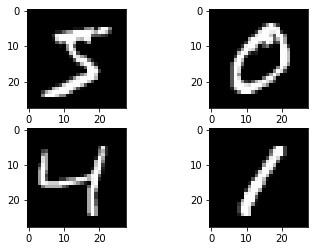

In [8]:
# plot ad hoc mnist instances
from keras.datasets import mnist
import matplotlib.pyplot as plt

# load the MNIST dataset
(X_train,y_train), (X_test,y_test) = mnist.load_data()

# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0],cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1],cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2],cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3],cmap=plt.get_cmap('gray'))

# show the plot
plt.savefig('digits')
plt.show()

# 2. Baseline Model with Multilayer Perceptrons

In [9]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [10]:
# load data
(X_train,y_train),(X_test,y_test) = mnist.load_data()

* For a multilayer perceptron model we must reduce the images down into a vector of pixels.
* In this case the 28*28 sized images will be 784 pixel input vectors.

In [11]:
# flatten 28*28 images to a 784 vector for each image
#num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0],28*28).astype('float32')
X_test = X_test.reshape(X_test.shape[0],28*28).astype('float32')
#y_train = y_train.reshape(y_train.shape[0],10).astype('float32')

In [12]:
print(X_train.shape) 

(60000, 784)


In [13]:
# normalize inputs from 0-255 to 0-1
X_train = X_train/255
X_test = X_test/255

In [14]:
# transforming the vector of class integers into a binary matrix
# one hot encoding

y_train = np_utils.to_categorical(y_train)
print(y_train.shape)
y_test = np_utils.to_categorical(y_test)
print(y_test.shape)
num_classes = y_test.shape[1]
print(num_classes)

(60000, 10)
(10000, 10)
10


In [15]:
# define baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(784,input_dim=784,activation='relu'))
    model.add(Dense(num_classes,activation='softmax'))
    
    # compile model
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    return model


* Model Strcuture
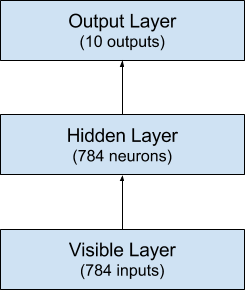

In [24]:
# build the model
model = baseline_model()

# Fit the model
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=20,batch_size=200,verbose=2)

# Final evaluation of the model
scores = model.evaluate(X_test,y_test,verbose=0)
print("Baseline Score: %.2f%%" %(scores[1]*100))

Epoch 1/20
300/300 - 2s - loss: 0.7633 - accuracy: 0.7739 - val_loss: 0.2886 - val_accuracy: 0.9139
Epoch 2/20
300/300 - 1s - loss: 0.3375 - accuracy: 0.8956 - val_loss: 0.2027 - val_accuracy: 0.9382
Epoch 3/20
300/300 - 1s - loss: 0.2658 - accuracy: 0.9178 - val_loss: 0.1689 - val_accuracy: 0.9481
Epoch 4/20
300/300 - 1s - loss: 0.2337 - accuracy: 0.9276 - val_loss: 0.1425 - val_accuracy: 0.9571
Epoch 5/20
300/300 - 1s - loss: 0.2065 - accuracy: 0.9356 - val_loss: 0.1260 - val_accuracy: 0.9630
Epoch 6/20
300/300 - 1s - loss: 0.1922 - accuracy: 0.9391 - val_loss: 0.1156 - val_accuracy: 0.9638
Epoch 7/20
300/300 - 2s - loss: 0.1830 - accuracy: 0.9430 - val_loss: 0.1098 - val_accuracy: 0.9663
Epoch 8/20
300/300 - 1s - loss: 0.1714 - accuracy: 0.9471 - val_loss: 0.1038 - val_accuracy: 0.9679
Epoch 9/20
300/300 - 1s - loss: 0.1654 - accuracy: 0.9494 - val_loss: 0.0993 - val_accuracy: 0.9686
Epoch 10/20
300/300 - 1s - loss: 0.1590 - accuracy: 0.9498 - val_loss: 0.0959 - val_accuracy: 0.9689

# 3. Simple Convolutional Neural Network for MNIST

In [17]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.convolutional import Conv2D
from keras.utils import np_utils

In [18]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [19]:
# load data
(X_train,y_train),(X_test,y_test) = mnist.load_data()

# reshape to be [samples][channels][width][height]
X_train = X_train.reshape(X_train.shape[0],1,28,28).astype('float32')
X_test = X_test.reshape(X_test.shape[0],1,28,28).astype('float32')

In [20]:
# normalize inputs from 0-255 to 0-1
X_train = X_train/255
X_test = X_test/255

# one hot encoding outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]
print(num_classes)

10


## structure of CNN
1. The first hidden layer is a convolutional layer called a **Convolution2D**.The layer has 32 feature maps with size of 5*5 and a rectifier activation function.Expecting input images.
2. pooling layer called **MaxPooling2D**.pool size is 2*2.
3. **Dropout Regularization**,it is configured to randomly exclude 20% of neurons in the layer in order to reduce overfitting.
4. **Flatten** converts the 2D matrix data to a vector.It allows the output to be processed by standard fully connected layers.
5. **fully connected layer** with 128 neurons and a rectifier activation function.
6. **Output layer** has 10 neurons for 10 classes and softmax function to output probability-like predictions for each class.
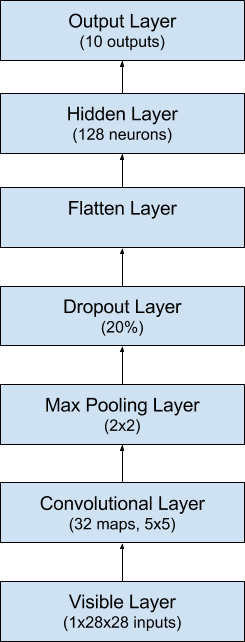


In [21]:
def baseline_model():
    # create model
    model = Sequential()
    model.add(Conv2D(32,5,5,padding='same',input_shape=(1,28,28),activation='relu'))
    model.add(MaxPooling2D((2,2), padding='same'))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128,activation='relu'))
    model.add(Dense(num_classes,activation='softmax'))
    
    # compile model
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    return model

In [25]:
# build the model
model = baseline_model()

# fit the model
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=20,batch_size=200,verbose=2)

# Final evaluation of the model
scores = model.evaluate(X_test,y_test,verbose=0)
print("CNN Score: %.2f%%" %(scores[1]*100))

Epoch 1/20
300/300 - 2s - loss: 0.7715 - accuracy: 0.7638 - val_loss: 0.3080 - val_accuracy: 0.9092
Epoch 2/20
300/300 - 1s - loss: 0.3548 - accuracy: 0.8919 - val_loss: 0.2182 - val_accuracy: 0.9363
Epoch 3/20
300/300 - 1s - loss: 0.2850 - accuracy: 0.9114 - val_loss: 0.1857 - val_accuracy: 0.9423
Epoch 4/20
300/300 - 1s - loss: 0.2471 - accuracy: 0.9236 - val_loss: 0.1567 - val_accuracy: 0.9518
Epoch 5/20
300/300 - 1s - loss: 0.2239 - accuracy: 0.9309 - val_loss: 0.1446 - val_accuracy: 0.9544
Epoch 6/20
300/300 - 1s - loss: 0.2052 - accuracy: 0.9367 - val_loss: 0.1315 - val_accuracy: 0.9597
Epoch 7/20
300/300 - 1s - loss: 0.1919 - accuracy: 0.9394 - val_loss: 0.1232 - val_accuracy: 0.9619
Epoch 8/20
300/300 - 1s - loss: 0.1807 - accuracy: 0.9439 - val_loss: 0.1183 - val_accuracy: 0.9629
Epoch 9/20
300/300 - 2s - loss: 0.1734 - accuracy: 0.9451 - val_loss: 0.1116 - val_accuracy: 0.9658
Epoch 10/20
300/300 - 1s - loss: 0.1636 - accuracy: 0.9492 - val_loss: 0.1101 - val_accuracy: 0.9652

# Larger Convolutional Neural Network
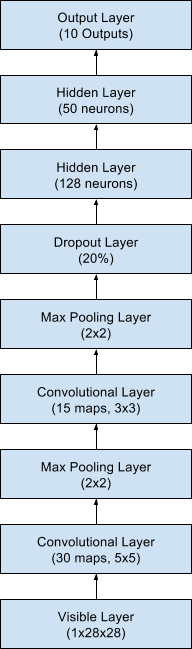


In [27]:
def larger_model():
    # create model
    model = Sequential()
    model.add(Convolution2D(30, 5, 5, input_shape=(1, 28, 28),padding='same', activation='relu' ))
    model.add(MaxPooling2D((2,2), padding='same'))
    model.add(Convolution2D(15, 3, 3,padding='same', activation='relu' ))
    model.add(MaxPooling2D((2,2), padding='same'))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu' ))
    model.add(Dense(50, activation='relu' ))
    model.add(Dense(num_classes, activation='softmax' ))
    # Compile model
    model.compile(loss='categorical_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ])
    return model
# build the model
model = larger_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=200,verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Large CNN Score: %.2f%%" % (scores[1]*100))

Epoch 1/20
300/300 - 2s - loss: 1.0532 - accuracy: 0.6365 - val_loss: 0.4729 - val_accuracy: 0.8564
Epoch 2/20
300/300 - 2s - loss: 0.5301 - accuracy: 0.8234 - val_loss: 0.3176 - val_accuracy: 0.9070
Epoch 3/20
300/300 - 2s - loss: 0.4063 - accuracy: 0.8688 - val_loss: 0.2471 - val_accuracy: 0.9234
Epoch 4/20
300/300 - 2s - loss: 0.3463 - accuracy: 0.8912 - val_loss: 0.2041 - val_accuracy: 0.9365
Epoch 5/20
300/300 - 2s - loss: 0.3090 - accuracy: 0.9031 - val_loss: 0.1881 - val_accuracy: 0.9413
Epoch 6/20
300/300 - 2s - loss: 0.2851 - accuracy: 0.9090 - val_loss: 0.1743 - val_accuracy: 0.9457
Epoch 7/20
300/300 - 2s - loss: 0.2673 - accuracy: 0.9167 - val_loss: 0.1643 - val_accuracy: 0.9485
Epoch 8/20
300/300 - 2s - loss: 0.2541 - accuracy: 0.9197 - val_loss: 0.1629 - val_accuracy: 0.9497
Epoch 9/20
300/300 - 2s - loss: 0.2403 - accuracy: 0.9256 - val_loss: 0.1559 - val_accuracy: 0.9526
Epoch 10/20
300/300 - 2s - loss: 0.2351 - accuracy: 0.9252 - val_loss: 0.1485 - val_accuracy: 0.9558